<a href="https://www.kaggle.com/code/venkat91221/gun-violence-2023-2024-wip?scriptVersionId=166737663" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/2023-us-gun-violence/us-gun-violence-2023.csv")
data.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2790854,"December 31, 2023",California,Hawthorne,14125 Crenshaw Blvd,1,5,0,0,0,NaN
1,2791696,"December 31, 2023",South Carolina,Little River,3389 Hwy 9 E,2,2,0,0,0,NaN
2,2791341,"December 31, 2023",North Carolina,Charlotte,300 S Church St,0,5,0,0,1,NaN
3,2790081,"December 30, 2023",Colorado,Denver,4888 W Colfax Ave,2,2,0,0,0,NaN
4,2790633,"December 30, 2023",Texas,Beaumont,6500 block of Bigner Rd,1,4,0,0,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        656 non-null    int64  
 1   Incident Date      656 non-null    object 
 2   State              656 non-null    object 
 3   City Or County     656 non-null    object 
 4   Address            654 non-null    object 
 5   Victims Killed     656 non-null    int64  
 6   Victims Injured    656 non-null    int64  
 7   Suspects Killed    656 non-null    int64  
 8   Suspects Injured   656 non-null    int64  
 9   Suspects Arrested  656 non-null    int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 56.5+ KB


In [4]:
filtered_data = data.dropna(subset=['State', 'Victims Killed'])

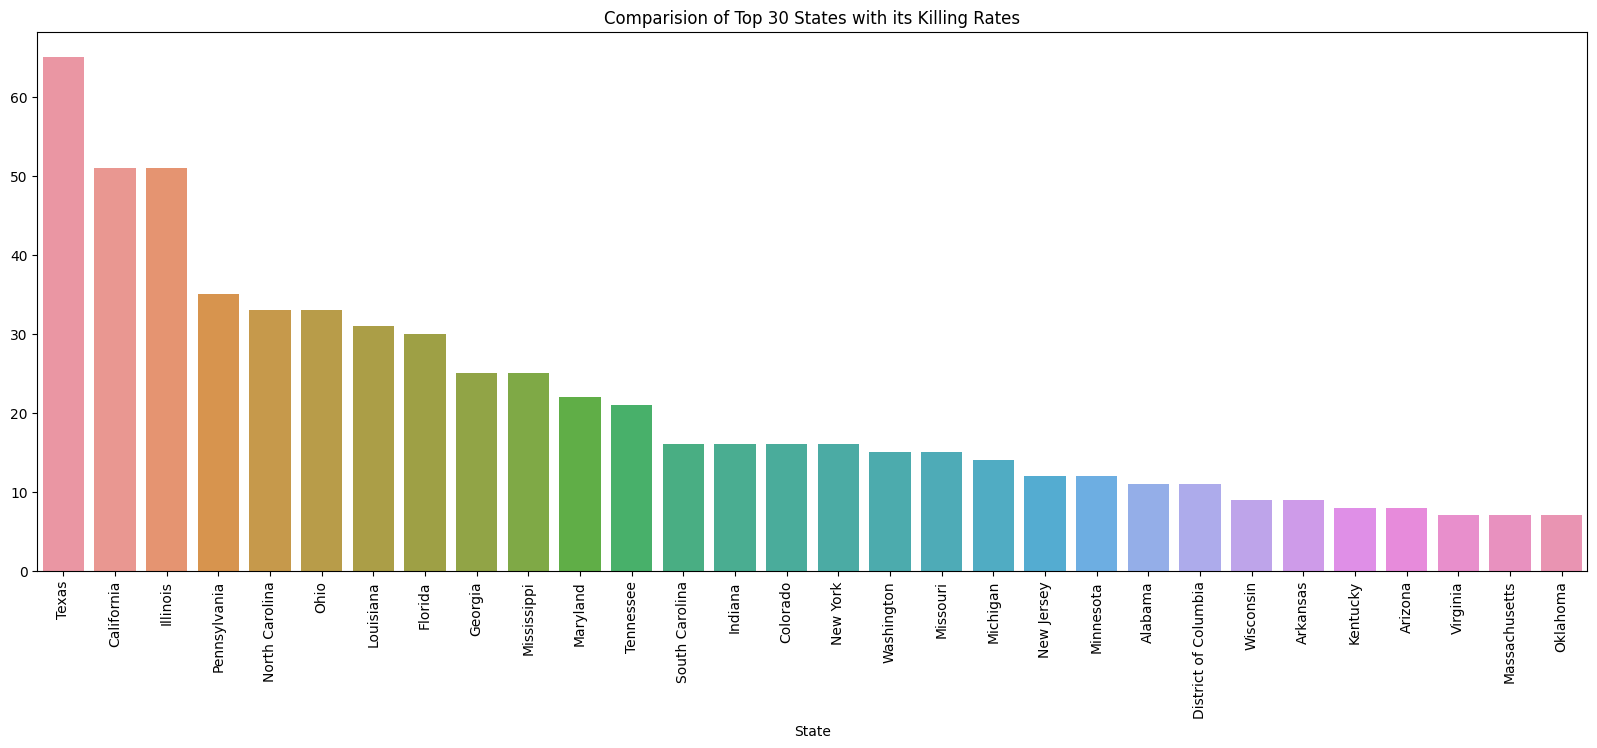

In [5]:
top30_kill_rates = data.groupby("State")["Victims Killed"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_kill_rates.index, y=top30_kill_rates.values)
plt.title('Comparision of Top 30 States with its Killing Rates')
plt.xticks(rotation=90)
plt.show() 

In [6]:
numerical_variables = ['Victims Killed', 'Victims Injured', 'Suspects Killed', 'Suspects Injured']

In [7]:
correlation_matrix = data[numerical_variables].corr()

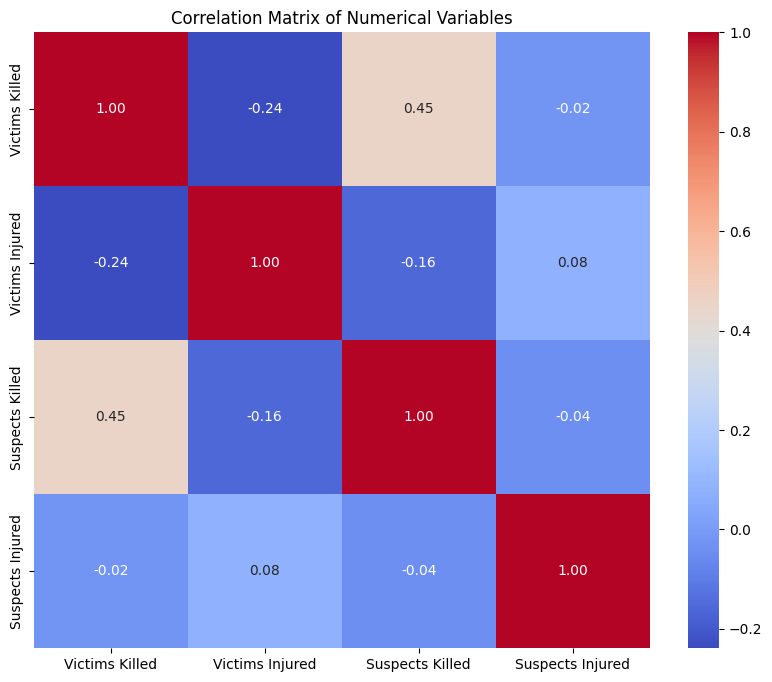

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [9]:
data_2024 = pd.read_csv("/kaggle/input/us-gun-violence-2024/us-gun-violence-2024.csv")

In [10]:
numerical_variables = ['Victims Killed', 'Victims Injured', 'Suspects Killed', 'Suspects Injured']

In [11]:
differences = data_2024[numerical_variables].mean() - data[numerical_variables].mean()

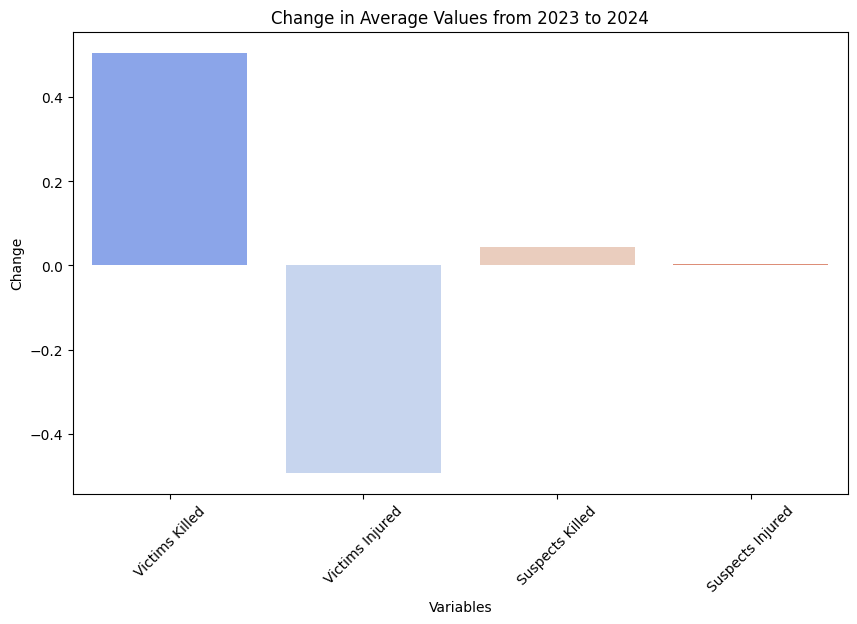

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=differences.index, y=differences.values, palette='coolwarm')
plt.title('Change in Average Values from 2023 to 2024')
plt.ylabel('Change')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()